In [79]:
from pypdf import PdfReader
import re
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np

# Extraction et traitement des données


## On extrait le texte du pdf

In [80]:
reader = PdfReader('Star_Wars_Episode_3_Revenge_Of_The_Sith.pdf')
npages = len(reader.pages)
text = ''
for i in range(npages):
    page = reader.pages[i]
    text += page.extract_text()


## On traite le texte pour diviser le script en scènes

In [81]:
temp = text.split('\n')
data = []

# On localise les scènes
scenes = []
for i in range(len(temp)):
    # George Lucas a oublié de mettre des points à tous les INT et EXT...
    if ("INT" in temp[i] or "EXT" in temp[i]) and "INTERCUT" not in temp[i]:
        scenes.append(i)

# On divise les scènes dans data
for i in range(len(scenes)-1):
    data.append(temp[scenes[i]:scenes[i+1]])
data.append(temp[scenes[-1]:])




## On cherche les personnages parlant dans chaque scène

In [82]:
characters = {}
pattern = r'\b[A-Za-z][A-Za-z0-9\- ]+:'
for i in range(len(data)):
    temp = ''.join(data[i][1:])
    personnages = re.findall(pattern, temp)
    personnages = [personnages[m].upper() for m in range(len(personnages))]
    if i not in characters:
        characters[i] = []
    for personnage in personnages:
        if personnage[:-1] not in characters[i]:
            characters[i].append(personnage[:-1])

for i in characters:
    print(i, characters[i])

0 []
1 []
2 ['ANAKIN', 'OBI-WAN']
3 []
4 ['OBI-WAN', 'ANAKIN']
5 ['OBI-WAN', 'ANAKIN', 'ODD BALL']
6 ['ODD BALL']
7 ['ANAKIN', 'OBI-WAN', 'ODD BALL', 'FIRST JEDI RULE', 'CLONE PILOT 2']
8 ['OBI-WAN', 'ANAKIN']
9 ['GENERAL GRIEVOUS', 'CAPTAIN']
10 ['BODYGUARD I', 'OBI-WAN', 'ANAKIN']
11 ['OBI-WAN', 'ANAKIN']
12 ['ANAKIN']
13 []
14 ['OBI-WAN', 'ANAKIN']
15 ['SUPER BATTLE DROID R77']
16 []
17 []
18 ['OBI-WAN']
19 ['ANAKIN', 'BATTLE DROID']
20 []
21 ['OBI-WAN', 'ANAKIN']
22 ['SUPER BATTLE DROID 1', 'SUPER BATTLE DROID 2']
23 ['OBI-WAN']
24 ['OBI-WAN']
25 []
26 ['OBI-WAN']
27 ['DROID 1', 'DROID 2']
28 ['SUPER BATTLE DROID 1', 'OBI-WAN']
29 ['OBI-WAN']
30 ['SUPER BATTLE DROID 1']
31 ['OBI-WAN']
32 ['SUPER BATTLE DROID 1']
33 ['OBI-WAN']
34 []
35 ['ANAKIN', 'OBI-WAN']
36 []
37 ['OBI-WAN', 'ANAKIN', 'PALPATINE', 'COUNT DOOKU']
38 ['PALPATINE', 'ANAKIN']
39 ['GENERAL GRIEVOUS', 'PILOT']
40 []
41 ['ANAKIN']
42 ['PILOT']
43 []
44 []
45 []
46 ['PILOT']
47 []
48 []
49 ['ANAKIN']
50 ['GENERAL GRIEVO

## On corrige les fautes de frappe

In [ ]:
error = 0
# G-3PO
characters[161].remove('G-3PO')
error += 1
 
# Qui -Gon
characters[221].remove('QUI -GON')
error += 1

# ANAKINN
characters[52].remove('ANAKINN')
error += 1

# Obi-Wan  (avec espace)
characters[85].remove('OBI-WAN ')
error += 1

# Dabth sidious
characters[140].remove('DABTH SIDIOUS')
characters[140].append('DARTH SIDIOUS')
error += 1

# Some errors
characters[7].remove(characters[7][3])
characters[129].remove(characters[129][0])
characters[115].remove(characters[115][0])
characters[104].remove(characters[104][2])
error += 4

for i in characters:
    if 'MACE' in characters[i]:
        characters[i].remove('MACE')
        characters[i].append('MACE WINDU')
        error += 1

    if 'MACE WLNDU' in characters[i]:
        characters[i].remove('MACE WLNDU')
        if "MACE WINDU" not in characters[i]:
            characters[i].append('MACE WINDU')
        error += 1

    if 'BAIL' in characters[i]:
        characters[i].remove('BAIL')
        if "BAIL ORGANA" not in characters[i]:
            characters[i].append('BAIL ORGANA')
        error += 1

    if 'DARTH SLDIOUS' in characters[i]:
        characters[i].remove('DARTH SLDIOUS')
        characters[i].append('DARTH SIDIOUS')
        error += 1

print("Nombre d'erreurs (hors fautes de majuscule): ", error)

Nombre d'erreurs (hors fautes de majuscule):  25


# Début du graphe

## Liste d'adjacence

In [84]:
nodes = []
edges = []
for i in characters:
    print(i, characters[i])

for i in characters:
    if len(characters[i]) >= 2:
        edges.append(characters[i])

    for j in characters[i]:
        if j not in nodes:
            nodes.append(j)
            
# sort nodes alphabetically
nodes.sort()
Nnodes = len(nodes)

# Faire la liste d'adjacence
adj = {}
for node in nodes:
    adj[node] = []

# Remplir la liste d'adjacence
for edge in edges:
    for i in range(len(edge)):
        adj[edge[i]] += edge[:i] + edge[i+1:]

0 []
1 []
2 ['ANAKIN', 'OBI-WAN']
3 []
4 ['OBI-WAN', 'ANAKIN']
5 ['OBI-WAN', 'ANAKIN', 'ODD BALL']
6 ['ODD BALL']
7 ['ANAKIN', 'OBI-WAN', 'ODD BALL', 'CLONE PILOT 2']
8 ['OBI-WAN', 'ANAKIN']
9 ['GENERAL GRIEVOUS', 'CAPTAIN']
10 ['BODYGUARD I', 'OBI-WAN', 'ANAKIN']
11 ['OBI-WAN', 'ANAKIN']
12 ['ANAKIN']
13 []
14 ['OBI-WAN', 'ANAKIN']
15 ['SUPER BATTLE DROID R77']
16 []
17 []
18 ['OBI-WAN']
19 ['ANAKIN', 'BATTLE DROID']
20 []
21 ['OBI-WAN', 'ANAKIN']
22 ['SUPER BATTLE DROID 1', 'SUPER BATTLE DROID 2']
23 ['OBI-WAN']
24 ['OBI-WAN']
25 []
26 ['OBI-WAN']
27 ['DROID 1', 'DROID 2']
28 ['SUPER BATTLE DROID 1', 'OBI-WAN']
29 ['OBI-WAN']
30 ['SUPER BATTLE DROID 1']
31 ['OBI-WAN']
32 ['SUPER BATTLE DROID 1']
33 ['OBI-WAN']
34 []
35 ['ANAKIN', 'OBI-WAN']
36 []
37 ['OBI-WAN', 'ANAKIN', 'PALPATINE', 'COUNT DOOKU']
38 ['PALPATINE', 'ANAKIN']
39 ['GENERAL GRIEVOUS', 'PILOT']
40 []
41 ['ANAKIN']
42 ['PILOT']
43 []
44 []
45 []
46 ['PILOT']
47 []
48 []
49 ['ANAKIN']
50 ['GENERAL GRIEVOUS', 'PILOT']
51 []

## Création du graphe

In [85]:
# Graphe entier
G = nx.Graph()

for i in nodes:
    G.add_node(i)

for i in G.nodes():
    for j in adj[i]:
        G.add_edge(i, j)


### Plot du graphe

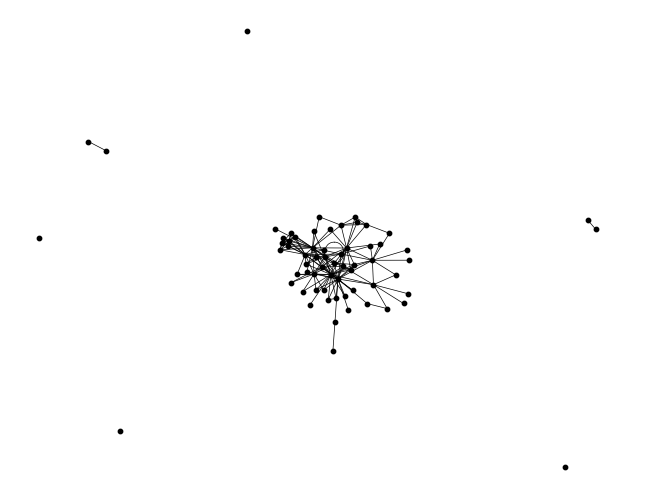

In [86]:
g_draw = G
pos = nx.spring_layout(g_draw)
nx.draw(g_draw, pos, node_color='black', node_size=10, width=0.5)

### Degrees

Text(0.5, 1.0, 'Degree distribution')

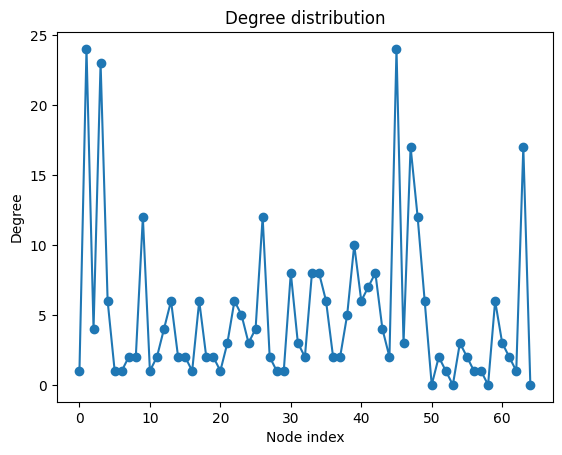

In [87]:
degrees = [G.degree(node) for node in nodes]
plt.plot(degrees,  linestyle='-', marker='o')
plt.xlabel('Node index')
plt.ylabel('Degree')
plt.title('Degree distribution')


Text(0.5, 1.0, 'Degree distribution')

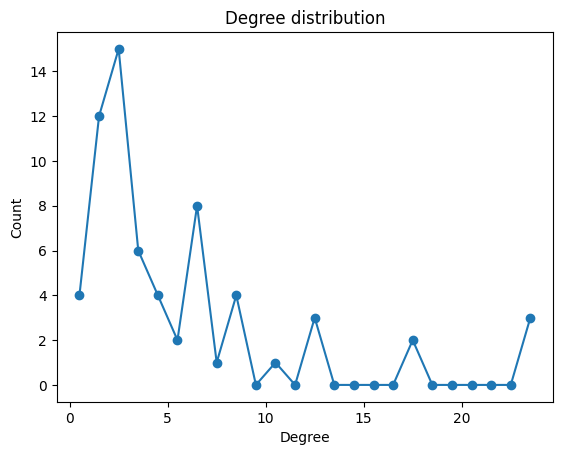

In [88]:
b_width = 1
bins = np.arange(min(degrees), max(degrees)+b_width, b_width)
hist, bins = np.histogram(degrees, bins = bins)
center_bins = [l+b_width/2 for l in bins[:-1]]

plt.plot(center_bins, hist, marker = "o")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution")


## Composantes connexes
Identification des composantes connexes

In [89]:
connect = nx.is_connected(G)
N_connected = nx.number_connected_components(G)
max_connected = max(nx.connected_components(G), key=len)
max_cc = G.subgraph(max_connected)



print("Le graphe est-il connexe ? ", connect)
print("Nombre de composantes connexes : ", N_connected)


Le graphe est-il connexe ?  False
Nombre de composantes connexes :  7


On plot la composante connexe la plus grande

Graph with 57 nodes and 160 edges


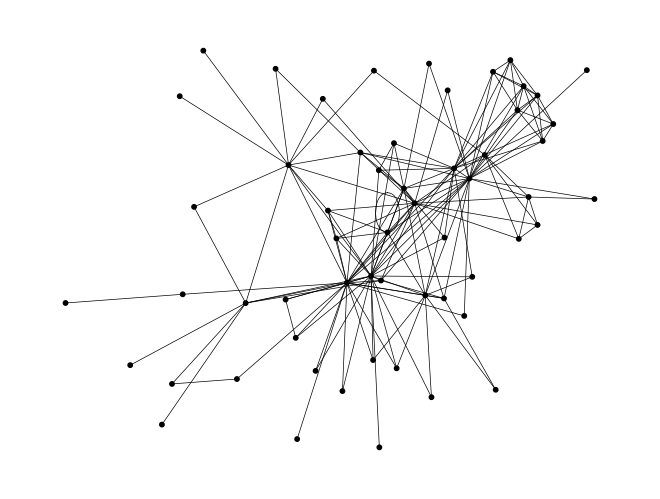

In [90]:
cc_draw = max_cc

color = np.array(["black"] * len(max_cc.nodes()))

pos = nx.spring_layout(cc_draw)
nx.draw(cc_draw, pos, node_color=color, node_size=10, width=0.5)

print(max_cc)

In [91]:
# print neighbors of each nodes of max_cc
for node in max_cc.nodes():
    print(node, " : ", list(max_cc.neighbors(node)))

ANAKIN  :  ['OBI-WAN', 'ODD BALL', 'CLONE PILOT 2', 'BODYGUARD I', 'BATTLE DROID', 'PALPATINE', 'COUNT DOOKU', 'SUPER BATTLE DROID', 'GENERAL GRIEVOUS', 'PILOT', 'FLRESHIP PILOT', 'BAIL ORGANA', 'C-3PO', 'MACE WINDU', 'PADME', 'YODA', 'KL-ADI-MUNDI', 'CAPTAIN TYPHO', 'MOTEE', 'JAR JAR', 'FANGZAR', 'CLONE COMMANDER CODY', 'THREEPIO', 'DARTH SIDIOUS']
AT-ST CLONE SERGEANT  :  ['CREATURE', 'CLONE SERGEANT', 'CLONE TROOPER', 'YODA']
BAIL ORGANA  :  ['ANAKIN', 'OBI-WAN', 'PALPATINE', 'C-3PO', 'MACE WINDU', 'PADME', 'FANG ZAR', 'MON MOTHMA', 'GIDDEAN DANU', 'TERR TANEEL', 'GLDDEAN DANU', 'BANA BREEMU', 'CHI EEKWAY', 'CLONE SERGEANT', 'CLONE COMMANDER APPO', 'ROYAL GUARD', 'CAPTAIN ANTILLES', 'YODA', 'PILOT', 'MAS AMEDDA', 'GUARD', 'QUI-GON', 'MEDICAL DROID']
BANA BREEMU  :  ['BAIL ORGANA', 'PADME', 'MON MOTHMA', 'GIDDEAN DANU', 'CHI EEKWAY', 'FANG ZAR']
BATTLE DROID  :  ['ANAKIN']
BODYGUARD  :  ['GENERAL GRIEVOUS', 'TLON MEDON']
BODYGUARD I  :  ['ANAKIN', 'OBI-WAN']
C-3PO  :  ['ANAKIN', 'BAI